In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft
from scipy import signal

In [3]:
#Radar parameters setting
maxR = 200 #Maximum range
rangeRes = 1 #Range resolution 
maxV = 70 #Maximum speed
fc = 77e9 #Carrier frequency
c = 3e8 #Speed of light

r0 = 100 #Target distance
v0 = 70 #Target speed

B = c/(2*rangeRes) #Bandwidth
Tchirp = 5.5*2*maxR/c #Chirp time
endle_time = 6.3e-6 
slope = B/Tchirp #Chirp slope
f_IFmax = (slope*2*maxR)/c #Maximum IF frequency
f_IF = (slope*2*r0)/c #Current IF frequency

Nd = 128 #Number of chirp
Nr = 1024 #Numnber ADC sampling points
vres = (c/fc)/(2*Nd*(Tchirp+endle_time)) #Speed resolution 
Fs = Nr/Tchirp #Sampling rate

## TX signal

In [4]:
t = np.linspace(0,Nd*Tchirp,Nr*Nd) #Time of Tx and Rx
angle_freq = fc*t+(slope*t*t)/2 #Tx signal angle speed
freq = fc + slope*t #Tx frequency
Tx = np.cos(2*np.pi*angle_freq) #Waveform of Tx

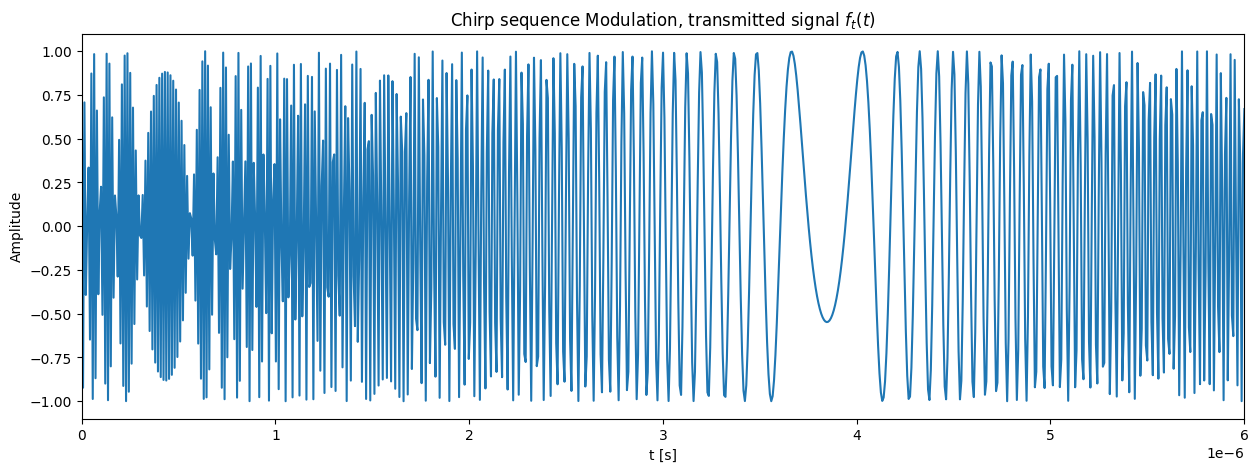

In [6]:
plt.figure(figsize=(15,5))
plt.plot(t, Tx)
plt.xlim(0, 6*1e-6)
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.title("Chirp sequence Modulation, transmitted signal $f_t(t)$");

plt.show()

## RX signal


In [7]:
td = 2*r0/c
freqRx = fc + slope*(t)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))

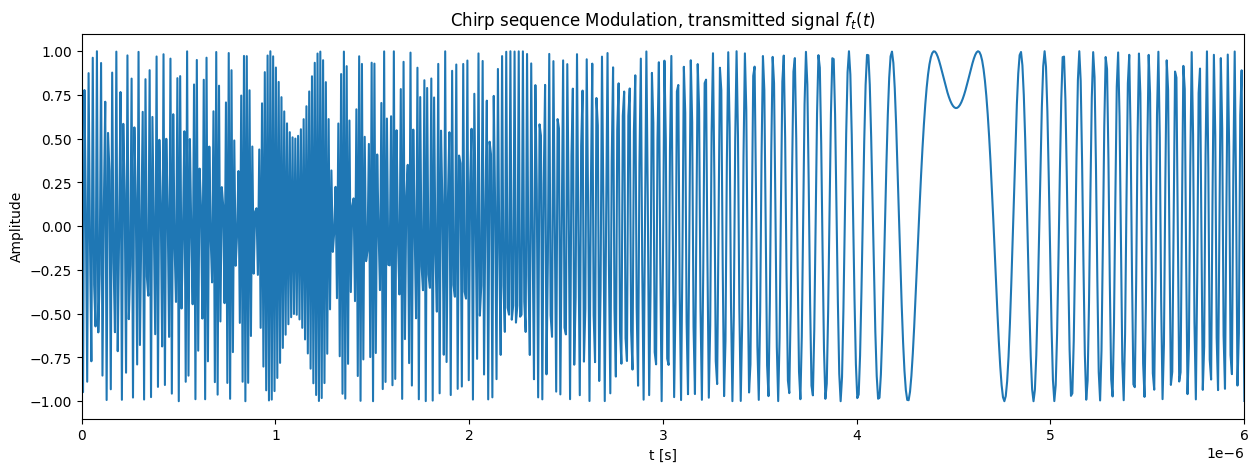

In [8]:
plt.figure(figsize=(15,5))
plt.plot(t, Rx)
plt.xlim(0, 6*1e-6)
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.title("Chirp sequence Modulation, transmitted signal $f_t(t)$");

plt.show()

## Filtering
According to the processing, assuming the IF signal can be represented by cos((2*pi*wt*t-2*pi*wr*t)),



In [9]:
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))

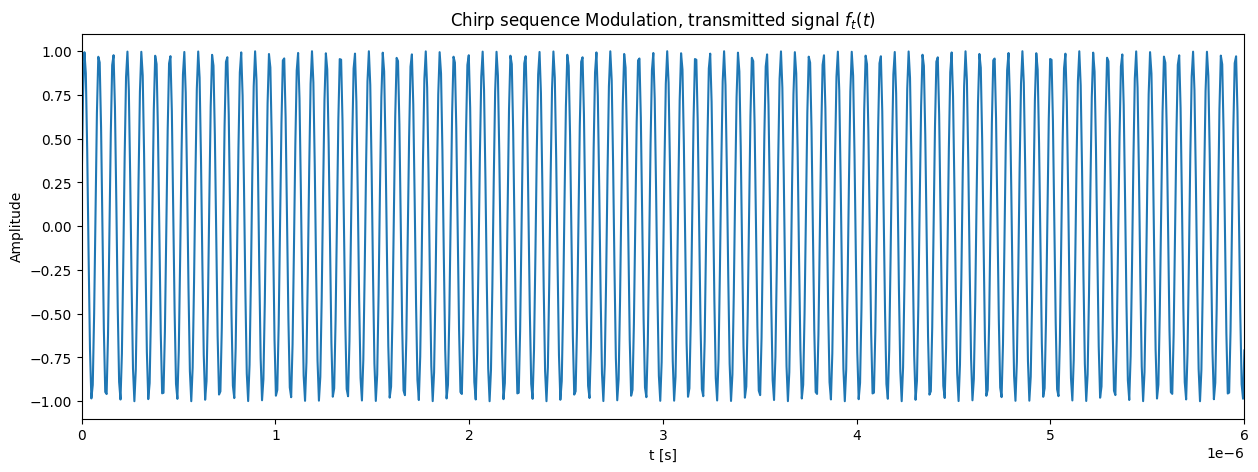

In [10]:
plt.figure(figsize=(15,5))
plt.plot(t, IFx)
plt.xlim(0, 6*1e-6)
plt.xlabel("t [s]")
plt.ylabel("Amplitude")
plt.title("Chirp sequence Modulation, transmitted signal $f_t(t)$");

plt.show()

## Spectrum

Text(0.5, 1.0, 'IF Signal FFT')

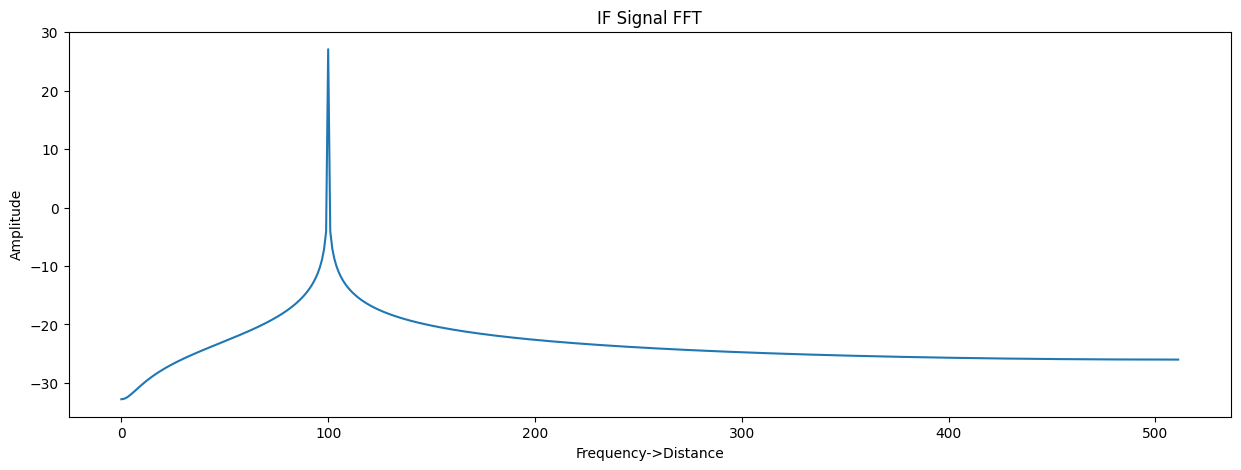

In [20]:
#Range FFT
doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
frequency = np.fft.fftfreq(1024, 1/Fs)
range = frequency*c/(2*slope)
plt.figure(figsize=(15,5))
plt.plot(range[0:512],doppler[0:512])
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')
